Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [130]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 

# from grader import Grader

In [131]:
DATA_FOLDER = '.'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

# transactions['date'] = pd.to_datetime(transactions['date'], format='%d.%m.%Y')

In [28]:
!ls -lah {DATA_FOLDER}

total 16M
drwxrwxrwx 1 franco franco 4.0K Aug 26 21:30 .
drwxrwxrwx 1 franco franco 4.0K Aug 26 00:25 ..
drwxrwxrwx 1 franco franco    0 Aug 26 00:29 .ipynb_checkpoints
-rwxrwxrwx 1 franco franco 3.5K Aug 26 00:24 item_categories.csv
-rwxrwxrwx 1 franco franco 1.5M Aug 26 00:24 items.csv
-rwxrwxrwx 1 franco franco  41K Aug 26 21:30 PandasBasics.ipynb
-rwxrwxrwx 1 franco franco  13M Aug 26 00:24 sales_train.csv.gz
-rwxrwxrwx 1 franco franco 469K Aug 26 00:24 sample_submission.csv.gz
-rwxrwxrwx 1 franco franco 3.0K Aug 26 00:24 shops.csv
-rwxrwxrwx 1 franco franco 1.1M Aug 26 00:24 test.csv.gz


The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [4]:
# grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
print(transactions.shape)
transactions[0:5]

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [58]:
print(items.shape)
items[0:5]

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [59]:
print(item_categories.shape)
item_categories[0:5]

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [60]:
print(shops.shape)
shops[0:5]

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [133]:
start = time.time()

days = np.vectorize(lambda x: int(x[0:2]))(transactions.date.values)
months = np.vectorize(lambda x: int(x[3:5]))(transactions.date.values)
years = np.vectorize(lambda x: int(x[8:]))(transactions.date.values)

end = time.time()
numpyTime = end - start

# days = transactions.date.dt.day
# months = transactions.date.dt.month
# years = transactions.date.dt.year

start = time.time()

days = transactions.date.map(lambda x: int(x[0:2]))
months = transactions.date.map(lambda x: int(x[3:5]))
years = transactions.date.map(lambda x: int(x[8:]))

end = time.time()
pandasTime = end - start
# months = transactions['date'].map(lambda x: x.month)
# years = transactions['date'].map(lambda x: x.year)

transactions = transactions.assign(day = lambda x: days, month = lambda x: months, year = lambda x: years)

filtered = transactions[(transactions.month==9) & (transactions.year==14)]

print('numpy: {}; pandas: {}'.format(round(numpyTime, 3), round(pandasTime, 3)))

filtered[0:5]

numpy: 2.856; pandas: 4.063


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
1953691,24.09.2014,20,5,1039,899.0,1.0,24,9,14
1953692,27.09.2014,20,5,1015,449.0,1.0,27,9,14
1953693,07.09.2014,20,5,1329,399.0,1.0,7,9,14
1953694,27.09.2014,20,5,984,399.0,1.0,27,9,14
1953695,08.09.2014,20,5,984,399.0,1.0,8,9,14


In [101]:
filtered = filtered.assign(revenue = lambda x: x.item_price* x.item_cnt_day)

In [56]:
round(max(filtered.groupby(['shop_id'])['revenue'].sum())*100)/100.

7982852.2

In [26]:
# YOUR CODE GOES HERE

max_revenue = 
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [78]:
filtered = transactions[(transactions.month >= 6) & (transactions.month <= 8) & (transactions.year == 14)]
filtered = filtered.assign(revenue = lambda x: x.item_price* x.item_cnt_day)
item_categories[item_categories.item_category_id == filtered.set_index('item_id')\
        .join(items.set_index('item_id')['item_category_id'])\
        .groupby('item_category_id')['revenue'].sum().idxmax()]

,item_category_name,item_category_id
20,Игры - PS4,20


In [34]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [105]:
sum(transactions.groupby('item_id').item_price.agg(lambda x: len(Counter(x.values)) == 1))

5926

In [42]:
# YOUR CODE GOES HERE

num_items_constant_price = 
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

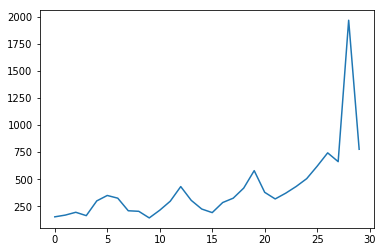

117167.70229885059

In [134]:
filtered = transactions[(transactions.shop_id == 25) & (transactions.month == 12) & (transactions.year == 14)]
counted = filtered.groupby('date')['item_cnt_day'].sum()

y = counted.values

plt.plot(y)
plt.show()

counted.var()

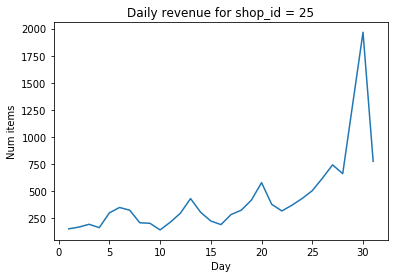

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [55]:
shop_id = 25


total_num_items_sold = 
days = 

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = 
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [59]:
STUDENT_EMAIL = 
STUDENT_TOKEN = 
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [60]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)